# Static - Interview Question Creation Based On Resume
> In this agent we will be implementing an AI which will look into resume and generate interview questions to evaluate candidate.

####  Step 1 - Ensure all environment variables are available and initialize LLM(s).

In [10]:
# Load Environment Variables

import os

from dotenv import load_dotenv
load_dotenv()

print('LOADED OPENAI_API_KEY :=',os.environ['OPENAI_API_KEY'] == os.getenv('OPENAI_API_KEY'))
print('LOADED LANGSMITH_API_KEY :=',os.environ['LANGSMITH_API_KEY'] == os.getenv('LANGSMITH_API_KEY'))
print('LOADED LANGSMITH_TRACING :=',os.environ['LANGSMITH_TRACING'] == os.getenv('LANGSMITH_TRACING'))

LOADED OPENAI_API_KEY := True
LOADED LANGSMITH_API_KEY := True
LOADED LANGSMITH_TRACING := True


In [11]:
# Create a LLM instance
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo")

####  Step 2 - Creating State in order to go ahead with workflow.

In [12]:
from typing import List
from typing_extensions import TypedDict, NotRequired, Literal, Annotated

import operator

# --- Leaf / child models ---
class ResumeAdditionalAward(TypedDict, total=False):
    title: NotRequired[str]

class ResumeCertification(TypedDict, total=False):
    certificate_name: NotRequired[str]
    certificate_link: NotRequired[str]
    issued_by: NotRequired[str]

class ResumeEducation(TypedDict, total=False):
    institution: NotRequired[str]
    location: NotRequired[str]
    degree_type: NotRequired[str]
    field_of_study: NotRequired[str]
    start_month_year: NotRequired[str]
    end_month_year: NotRequired[str]
    score_metric: NotRequired[str]
    score: NotRequired[str]

class ResumeExperience(TypedDict, total=False):
    employer: NotRequired[str]
    Job_title: NotRequired[str]
    location: NotRequired[str]
    start_month_year: NotRequired[str]
    end_month_year: NotRequired[str]

class ResumePersonalInfo(TypedDict, total=False):
    first_name: NotRequired[str]
    last_name: NotRequired[str]
    email: NotRequired[str]
    phone: NotRequired[str]
    address: NotRequired[str]
    dob: NotRequired[str]
    job_title: NotRequired[str]
    git_link: NotRequired[str]
    linkedin_profile: NotRequired[str]
    portfolio_link: NotRequired[str]

class ResumeProject(TypedDict, total=False):
    project_name: NotRequired[str]
    technologies_used: NotRequired[str]
    project_link: NotRequired[str]
    description: NotRequired[str]

class ResumeSkillSet(TypedDict, total=False):
    programming_languages: NotRequired[List[str]]
    libraries_and_frameworks: NotRequired[List[str]]
    tools_and_platforms: NotRequired[List[str]]
    databases: NotRequired[List[str]]
    concepts: NotRequired[List[str]]

class InterviewQuestion(TypedDict, total=False):
    id: str
    question_text: str
    difficulty_level: NotRequired[str]
    based_on: Literal['education', 'experience', 'skills', 'additional_awards', 'certifications', 'projects', 'personal_info', 'greet_and_small_talk']

# --- Root Resume model ---
class Resume(TypedDict, total=False):
    id: str
    profile_name: NotRequired[str]
    InterviewQuestion: Annotated[List[InterviewQuestion], operator.add]
    
    ResumeAdditionalAward: NotRequired[List[ResumeAdditionalAward]]
    ResumeCertification: NotRequired[List[ResumeCertification]]
    ResumeEducation: NotRequired[List[ResumeEducation]]
    ResumeExperience: NotRequired[List[ResumeExperience]]
    ResumePersonalInfo: ResumePersonalInfo
    ResumeProject: NotRequired[List[ResumeProject]]
    ResumeSkillSet: NotRequired[List[ResumeSkillSet]]

In [ ]:
# Sample Data
sample_resume: Resume = {
    "id": "a1b2c3d4-e5f6-7890-abcd-ef1234567890",
    "profile_name": "Backend Developer Resume",

    "ResumeAdditionalAward": [
        {"title": "Best Software Engineer Award 2023"},
        {"title": "Top Contributor - Open Source"}
    ],

    "ResumeCertification": [
        {
            "certificate_name": "AWS Certified Solutions Architect",
            "certificate_link": "https://aws.amazon.com/certification/",
            "issued_by": "Amazon Web Services"
        },
        {
            "certificate_name": "Google Cloud Professional Developer",
            "certificate_link": "https://cloud.google.com/certification",
            "issued_by": "Google Cloud"
        }
    ],

    "ResumeEducation": [
        {
            "institution": "Indian Institute of Technology Bombay",
            "location": "Mumbai, India",
            "degree_type": "B.Tech",
            "field_of_study": "Computer Science",
            "start_month_year": "Aug 2017",
            "end_month_year": "May 2021",
            "score_metric": "CGPA",
            "score": "8.7"
        }
    ],

    "ResumeExperience": [
        {
            "employer": "Coditas",
            "Job_title": "Software Engineer",
            "location": "Pune, India",
            "start_month_year": "Jun 2021",
            "end_month_year": "Aug 2023"
        },
        {
            "employer": "Jash Datasciences",
            "Job_title": "Backend Developer",
            "location": "Remote",
            "start_month_year": "Sep 2023",
            "end_month_year": "Present"
        }
    ],

    "ResumePersonalInfo": {
            "first_name": "Suyash",
            "last_name": "Lawand",
            "email": "suyash@example.com",
            "phone": "+91-9876543210",
            "address": "Pune, Maharashtra, India",
            "dob": "1999-04-15",
            "job_title": "Backend Developer",
            "git_link": "https://github.com/suyashlawand",
            "linkedin_profile": "https://linkedin.com/in/suyashlawand",
            "portfolio_link": "https://suyashlawand.dev"
        },

    "ResumeProject": [
        {
            "project_name": "Menu-Card",
            "technologies_used": "NestJS, PostgreSQL, Docker",
            "project_link": "https://menyokard.com",
            "description": "Real-time café management platform with QR-based ordering and billing."
        },
        {
            "project_name": "AI Resume Evaluator",
            "technologies_used": "Next.js, LangChain, Python",
            "project_link": "https://aireview.ai",
            "description": "An AI-driven resume analyzer with mock interview functionality."
        }
    ],

    "ResumeSkillSet": [
        {
            "programming_languages": ["Python", "Java", "TypeScript"],
            "libraries_and_frameworks": ["NestJS", "React", "Spring Boot"],
            "tools_and_platforms": ["Docker", "Kubernetes", "GitHub Actions"],
            "databases": ["PostgreSQL", "MySQL", "MongoDB"],
            "concepts": ["Microservices", "REST APIs", "Distributed Systems"]
        }
    ],

    "InterviewQuestion": []
}

####  Step 3 - Creating nodes in order to go ahead with workflow.

In [14]:
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from uuid import uuid4

def greet_and_small_talk(resume: Resume) -> Resume:
    pi = resume.get("ResumePersonalInfo", {})

    first_name = (pi.get("first_name") or "").strip()
    last_name = (pi.get("last_name") or "").strip()
    job_title = (pi.get("job_title") or resume.get("profile_name") or "the role").strip()
    current_location = (pi.get("address") or "").strip()
    education_list = resume.get("ResumeEducation", [])
    

    greeting_prompt = PromptTemplate(
        input_variables=["first_name", "last_name", "job_title", "location"],
        template="""
You are a professional and friendly AI interviewer.

Greet the candidate warmly using their name: {first_name} {last_name}.
If location is provided ({location}), mention it naturally.
Express enthusiasm for meeting them and starting the interview for the {job_title} position.

Keep the greeting short (2-3 sentences), friendly, and professional.
Do not ask any questions yet — this is only the opening.
    """)


    chain = greeting_prompt | llm | StrOutputParser()

    resume["InterviewQuestion"] = [{
        "id": str(uuid4()),
        "question_text": chain.invoke({
            "first_name": first_name,
            "last_name": last_name,
            "job_title": job_title,
            "location": current_location
        }),
        "difficulty_level": "easy",
        "based_on": "greet_and_small_talk"
    }]

    return resume

def generate_base_question(resume: Resume) -> Resume:
    skills = resume.get("ResumeSkillSet", [])
    resume["InterviewQuestion"] = []
    if not skills:
        return resume

    existing_questions = {
        q["question_text"].strip().lower()
        for q in resume.get("InterviewQuestion", [])
    }

    for skill_set in skills:
        for category, skill_items in skill_set.items():
            if not skill_items:
                continue

            for skill in skill_items:
                prompt = PromptTemplate(
                    input_variables=["skill", "category"],
                    template="""
You are a technical interviewer.

Your task is to generate a **problem-solving oriented** technical question that effectively evaluates the candidate's **practical understanding** of the following:

- Skill: {skill}
- Category: {category}

Guidelines:
- Ask **real-world, scenario-based** or **application-driven** questions that test problem-solving
- Keep the question **short, clear, and specific**
- Avoid behavioral, opinion-based, or HR-style questions
- Ensure the question **requires the candidate to think** or **apply knowledge**, not just recall facts
""".strip()
                )

                chain = prompt | llm | StrOutputParser()
                result = chain.invoke({
                    "skill": skill,
                    "category": category.replace('_', ' ').title(),
                }).strip()

                if result.lower() not in existing_questions:
                    resume["InterviewQuestion"].append({
                        "id": str(uuid4()),
                        "question_text": result,
                        "difficulty_level": "medium",
                        "based_on": f"{category.lower().replace(' ', '-')}:{skill.lower().replace(' ', '-')}",
                    })
                    existing_questions.add(result.lower())

    return resume

def generate_project_based_questions(resume: Resume) -> Resume:
    project_list = resume['ResumeProject']
    resume["InterviewQuestion"] = []

    for project in project_list:
        project_question_prompt = PromptTemplate(
            input_variables=["project_name", "technologies_used", "project_link", "description"],
            template="""
You are a technical interviewer.

Based on the following project from the candidate's resume, ask a thoughtful question to explore their role, decisions, and problem-solving skills.

Project Name: {project_name}
Technologies Used: {technologies_used}
Project Link: {project_link}
Description: {description}

Guidelines:
- Keep the question conversational but focused.
- Make it open-ended to encourage detailed responses.
- Focus on challenges, decision-making, or design trade-offs rather than just definitions.
- Avoid yes/no questions.
- The question should invite the candidate to explain their thought process and reasoning.

Output only the question text.
        """)

        chain = project_question_prompt | llm | StrOutputParser() 
        result = chain.invoke({
            "project_name": project['project_name'], "technologies_used": project['technologies_used'], "project_link": project['project_link'], "description": project['description']
        })

        resume["InterviewQuestion"].append({
            "id": str(uuid4()),
            "question_text": result,
            "difficulty_level": "medium",
            "based_on": f"projects:{(project['project_name']).lower().replace(' ', '-')}",
        })

    return resume

####  Step 4 - Creating graph!

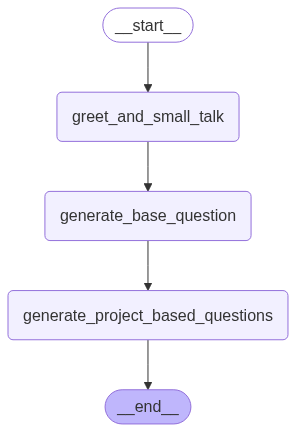

In [15]:
from langgraph.graph import START, END, StateGraph

graph = StateGraph(Resume)

# Add Nodes
graph.add_node('greet_and_small_talk', greet_and_small_talk)
graph.add_node('generate_base_question', generate_base_question)
graph.add_node('generate_project_based_questions', generate_project_based_questions)

# Add Edges
graph.add_edge(START, 'greet_and_small_talk')
graph.add_edge('greet_and_small_talk', 'generate_base_question')
graph.add_edge('generate_base_question', 'generate_project_based_questions')
graph.add_edge('generate_project_based_questions', END)

graph_builder = graph.compile()
graph_builder.validate()

In [16]:
generated_resume_with_questions = graph_builder.invoke(sample_resume)

In [17]:
generated_resume_with_questions['InterviewQuestion']

[{'id': '084b3404-b554-4115-b9f1-d1f3016a8b5b',
  'question_text': "Hello Akshay Jaiswal,\nWelcome! I'm thrilled to meet you today. Let's kick off our interview for the Data Analyst position.",
  'difficulty_level': 'easy',
  'based_on': 'greet_and_small_talk'},
 {'id': '8e6d28f3-6262-4649-b418-f454ddbe655d',
  'question_text': '**Question:**\nYou are working on a project where you need to parse a large CSV file in Python and extract specific columns of data. The CSV file is too big to load into memory all at once. How would you approach this problem to efficiently extract the required information without running into memory issues?',
  'difficulty_level': 'medium',
  'based_on': 'programming_languages:python'},
 {'id': '0c05f866-f5fa-44aa-97c5-b4ed7bb2c347',
  'question_text': 'Can you write a function in R that takes a list of numbers as input and returns the average value of those numbers, excluding any outliers that are greater than two standard deviations from the mean? This task 

In [18]:
print("Generated", len(generated_resume_with_questions['InterviewQuestion']), "question based on resume.")

Generated 20 question based on resume.
